## Preenchimento dos dados NaN + EDA (Exploratory Data Analysis)
Criar arquivos "marketok", "portifolio1ok", "portifolio2ok" e "portifolio3ok" com os features que possuem menos de 32% de dados faltantes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import missingno as msno

## Dados de Portifolio, trata-se de um determinado nicho de soluções.

In [3]:
df = pd.read_csv('portfolio2ok.csv', index_col=0)
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,True,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,11.243836,10 a 15,False,...,RIO BRANCO,True,NaN,NaN,NaN,"DE R$ 300.000.000,01 A R$ 500.000.000,00","DE R$ 300.000.000,01 A R$ 500.000.000,00",327487200.0,327487200.0,0
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.789041,> 20,False,...,AGRESTE POTIGUAR,True,NaN,NaN,NaN,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",176802910.0,176802910.0,0
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,...,BAIXO PARNAIBA PIAUIENSE,True,2.0,2.0,0.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",27818640.0,27818640.0,0
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,True,MUNICIPIO,AM,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,39.671233,> 20,False,...,ALTO SOLIMOES,True,NaN,NaN,NaN,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",221518800.0,221518800.0,1
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,PRODUTOS DE AGROPECUARIA,AGROPECUARIA,20.268493,> 20,False,...,MOSSORO,True,4.0,4.0,0.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",28127736.0,28127736.0,0


In [4]:
# removendo 'qt_socios_pj', 'qt_socios_pf', 'qt_socios', pois há muitos dados faltantes, 
#não há como prever seu campo e influenciam pouco no mercado.
df = df.drop(columns=['qt_socios_pj', 'qt_socios_pf', 'qt_socios'])
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,True,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,11.243836,10 a 15,False,...,False,2791.15,VALE DO ACRE,RIO BRANCO,True,"DE R$ 300.000.000,01 A R$ 500.000.000,00","DE R$ 300.000.000,01 A R$ 500.000.000,00",327487200.0,327487200.0,0
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.789041,> 20,False,...,False,1007.87,AGRESTE POTIGUAR,AGRESTE POTIGUAR,True,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",176802910.0,176802910.0,0
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,...,False,688.31,NORTE PIAUIENSE,BAIXO PARNAIBA PIAUIENSE,True,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",27818640.0,27818640.0,0
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,True,MUNICIPIO,AM,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,39.671233,> 20,False,...,False,1397.47,SUDOESTE AMAZONENSE,ALTO SOLIMOES,True,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",221518800.0,221518800.0,1
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,PRODUTOS DE AGROPECUARIA,AGROPECUARIA,20.268493,> 20,False,...,False,707.20,OESTE POTIGUAR,MOSSORO,True,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",28127736.0,28127736.0,0


In [5]:
df.shape

(566, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 565
Data columns (total 43 columns):
id                                       566 non-null object
fl_matriz                                566 non-null bool
de_natureza_juridica                     566 non-null object
sg_uf                                    566 non-null object
natureza_juridica_macro                  566 non-null object
de_ramo                                  566 non-null object
setor                                    566 non-null object
idade_empresa_anos                       566 non-null float64
idade_emp_cat                            566 non-null object
fl_me                                    566 non-null bool
fl_sa                                    566 non-null bool
fl_epp                                   566 non-null bool
fl_mei                                   566 non-null bool
fl_ltda                                  566 non-null bool
dt_situacao                              566 non-nul

# Avaliação de dados faltantes

### Percebe-se que este portifolio possui um elevado número de dados faltantes.

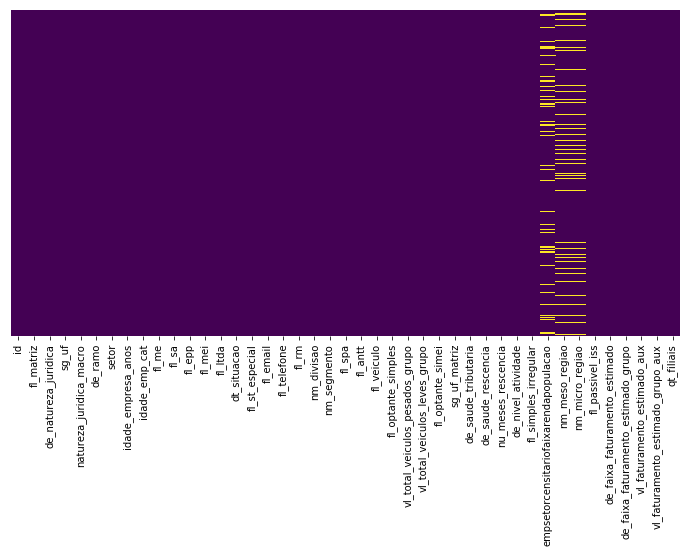

In [7]:
# plot dados faltantes geral
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

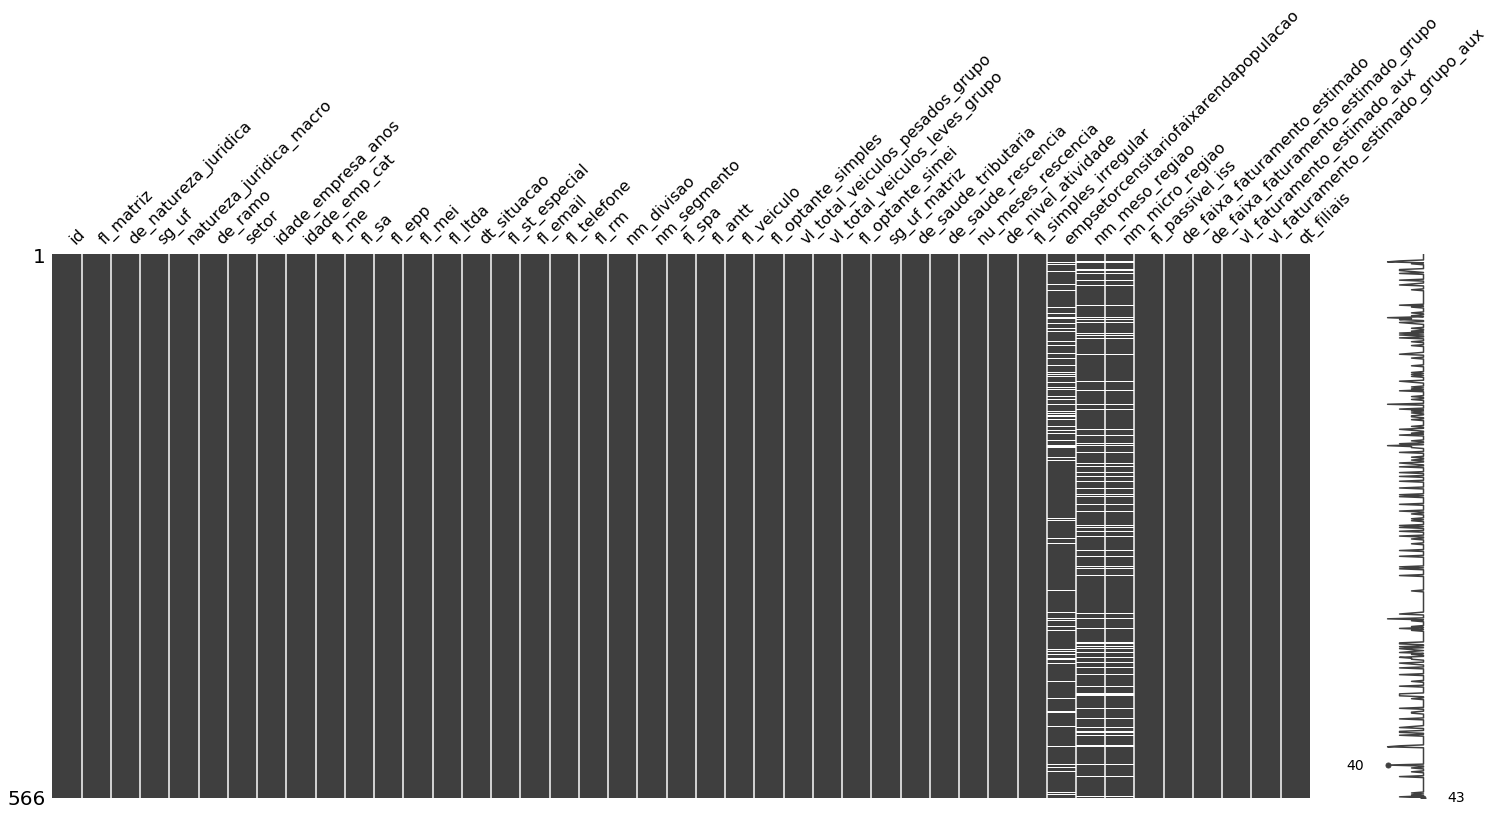

In [8]:
# plot dados faltantes geral
msno.matrix(df)

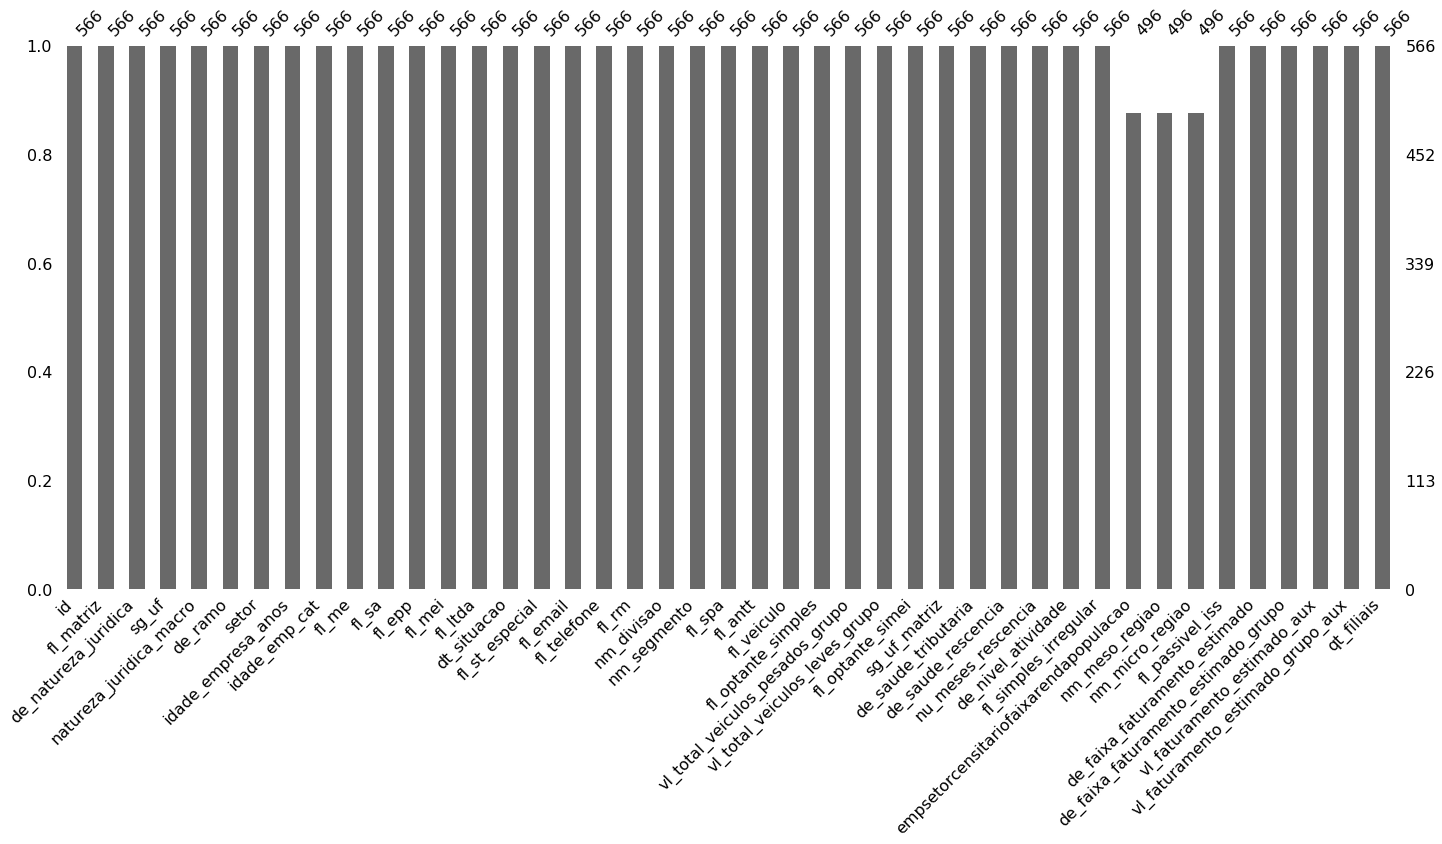

In [9]:
# plot dados faltantes geral
msno.bar(df)

In [10]:
# checkin what is numerical features
num_feat = df.select_dtypes(include=[np.number])
num_feat.columns

Index(['idade_empresa_anos', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia',
       'empsetorcensitariofaixarendapopulacao', 'vl_faturamento_estimado_aux',
       'vl_faturamento_estimado_grupo_aux', 'qt_filiais'],
      dtype='object')

In [11]:
# checkin what is categorical features
cat_feat = df.select_dtypes(include=[np.object])
cat_feat.columns

Index(['id', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_emp_cat', 'dt_situacao', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'de_nivel_atividade', 'nm_meso_regiao',
       'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo'],
      dtype='object')

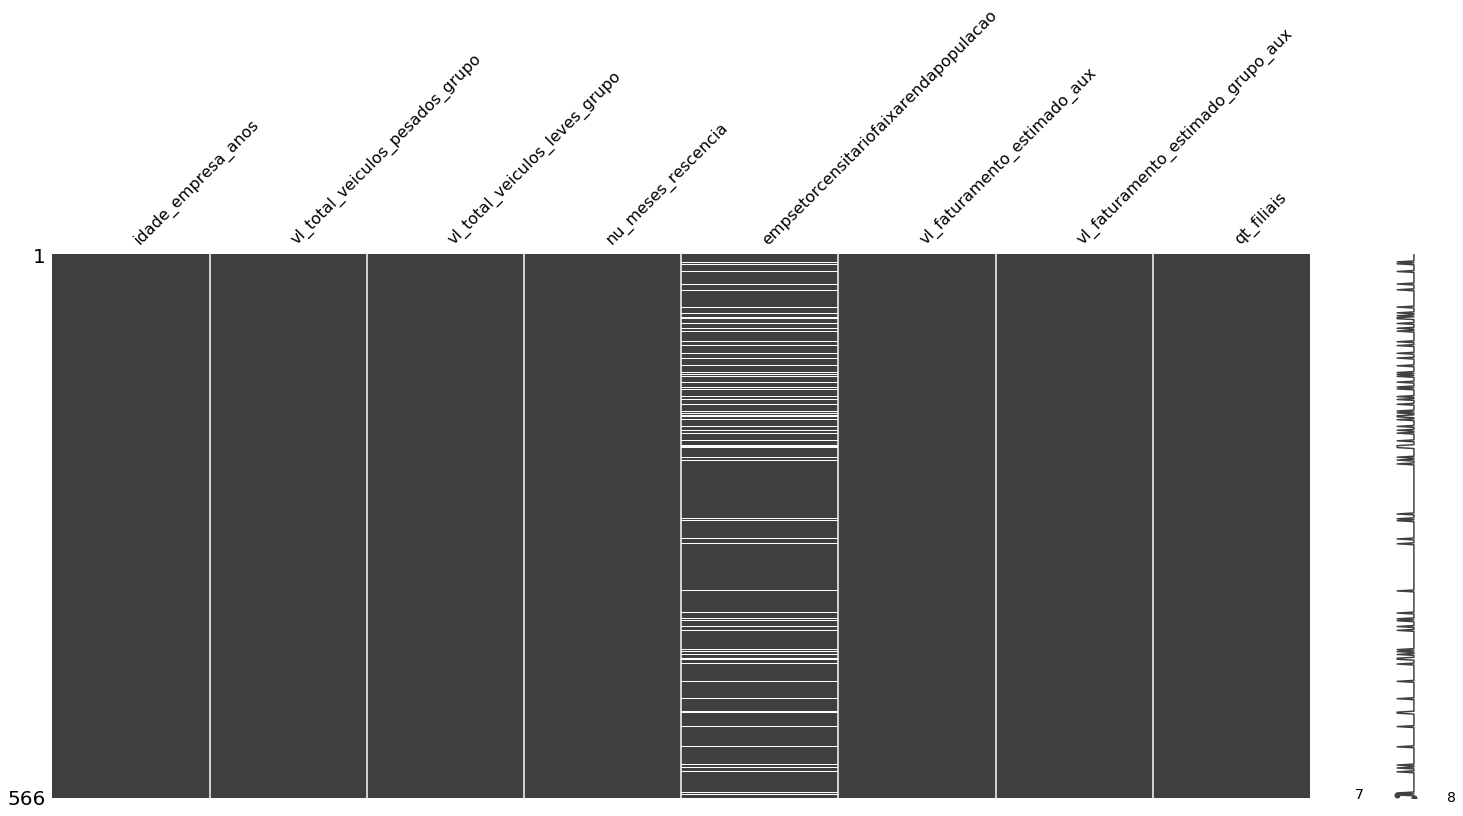

In [12]:
# plot dados faltantes para os features numericos
msno.matrix(num_feat)

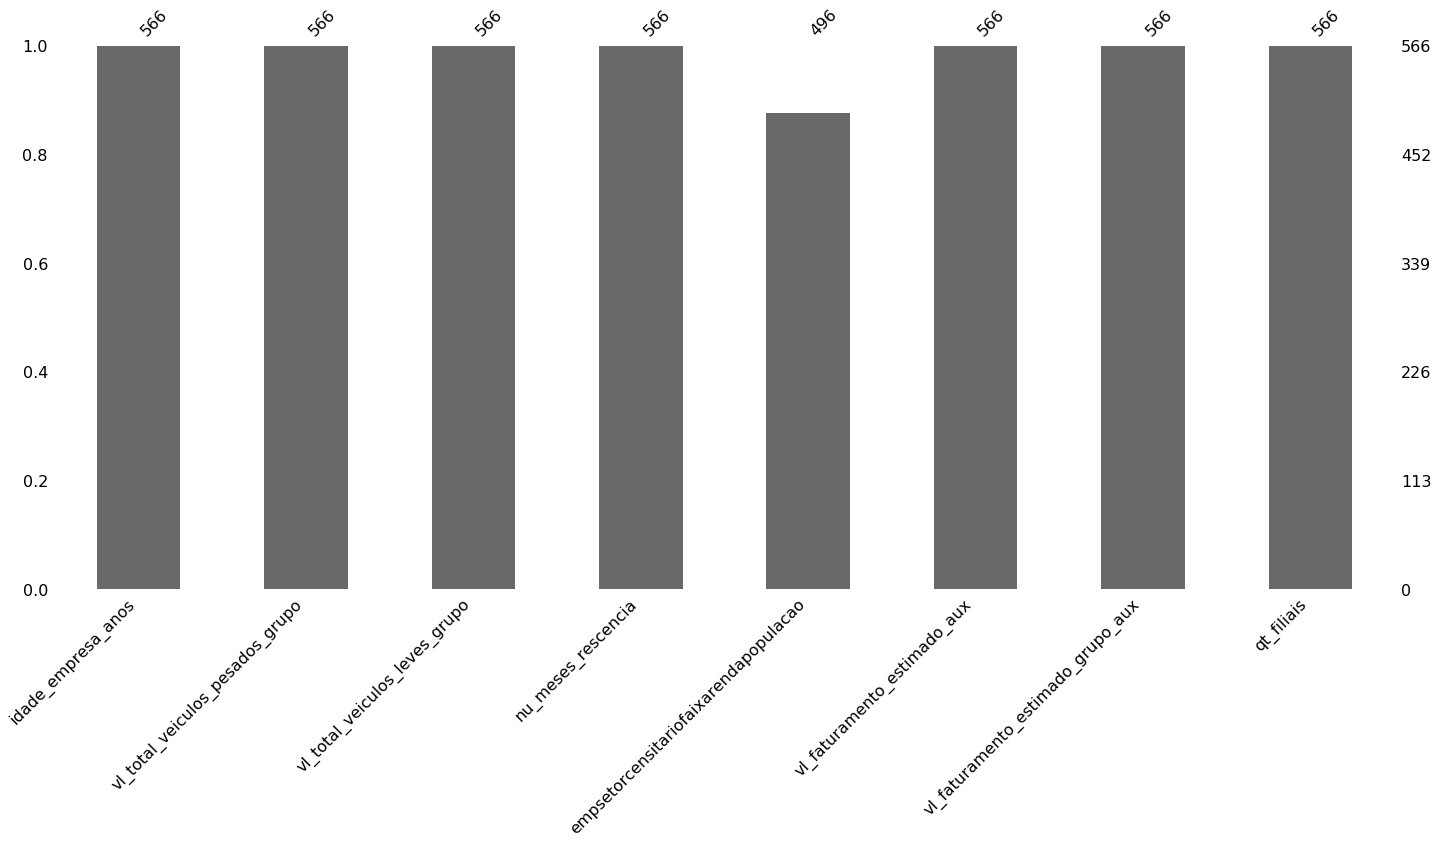

In [13]:
# plot dados faltantes para os features numericos
msno.bar(num_feat)

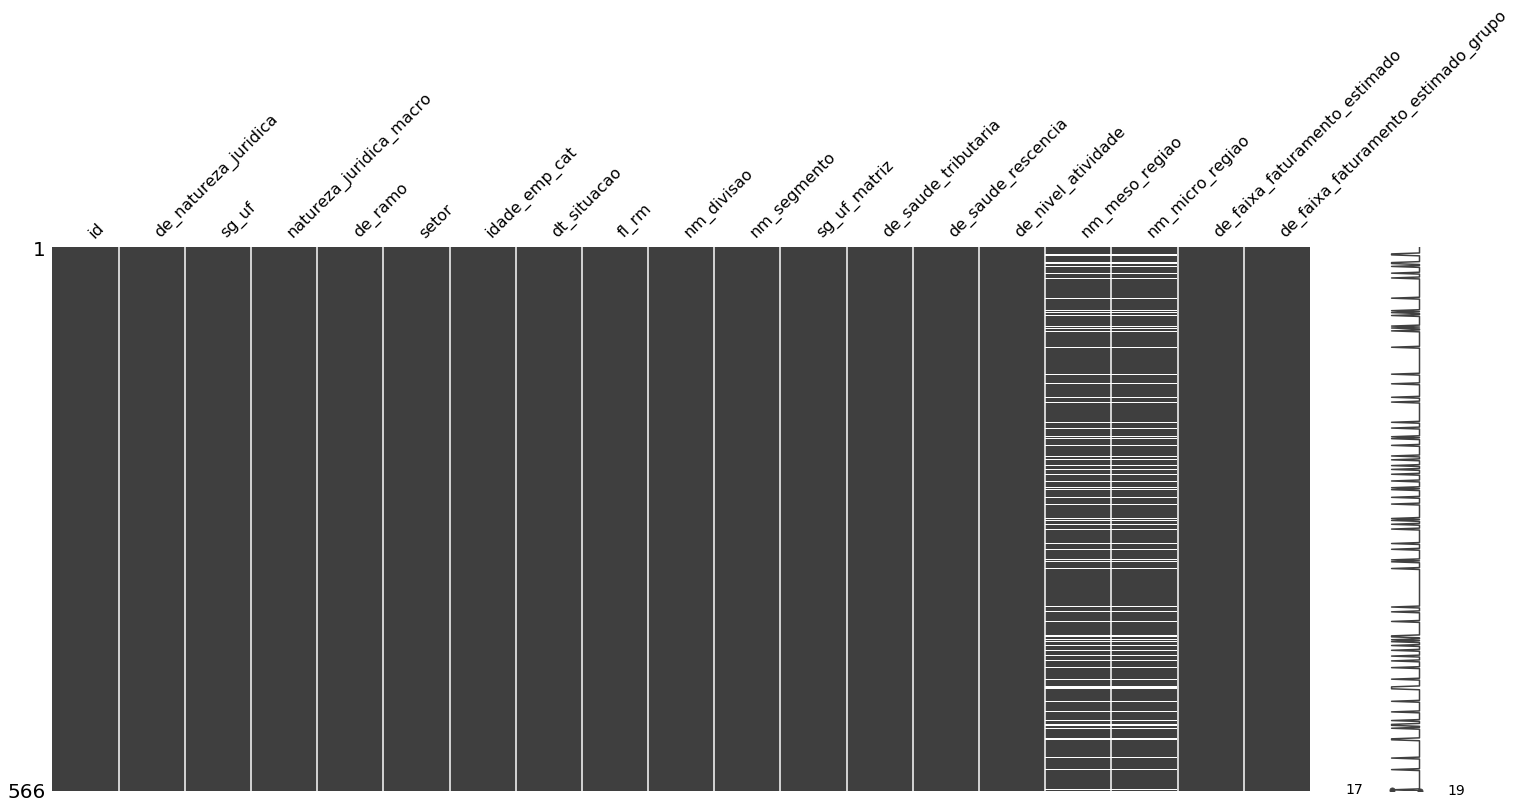

In [14]:
# plot dados faltantes para os features categoricos
msno.matrix(cat_feat)

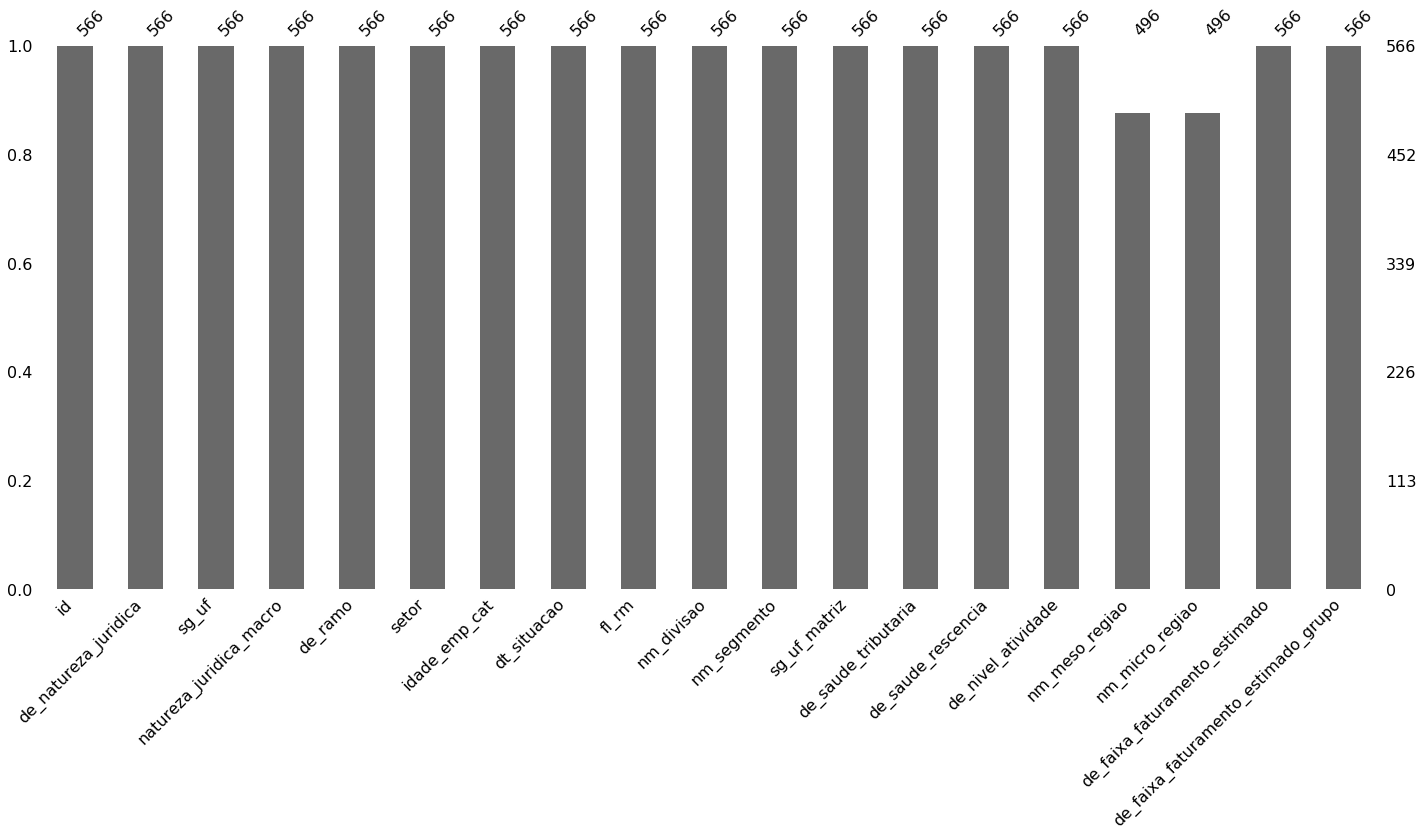

In [15]:
# plot dados faltantes para os features categoricos
msno.bar(cat_feat)

## Quantificando dados faltantes
#### entre numericos e categoricos

In [16]:
total_num_feat = num_feat.isnull().sum().sort_values(ascending=False)
total_num_feat.sum()

70

In [17]:
percent_num_feat = (num_feat.isnull().sum()/num_feat.isnull().count()).sort_values(ascending=False)
round(percent_num_feat.sum(), 2)

0.12

In [18]:
missing_data_num_feat = pd.concat([total_num_feat, percent_num_feat], axis=1,join='outer', keys=['Total_Missing_Count', 'Percent_of_Missing'])
missing_data_num_feat.index.name ='features'
missing_data_num_feat.head(5)

,Total_Missing_Count,Percent_of_Missing
features,,
empsetorcensitariofaixarendapopulacao,70,0.123675
qt_filiais,0,0.000000
vl_faturamento_estimado_grupo_aux,0,0.000000
vl_faturamento_estimado_aux,0,0.000000
nu_meses_rescencia,0,0.000000


In [19]:
total_cat_feat = cat_feat.isnull().sum().sort_values(ascending=False)
total_cat_feat.sum()

140

In [20]:
percent_cat_feat = (cat_feat.isnull().sum()/cat_feat.isnull().count()).sort_values(ascending=False)
round(percent_cat_feat.sum(), 2)

0.25

In [52]:
missing_data_cat_feat = pd.concat([total_cat_feat, percent_cat_feat], axis=1,join='outer', keys=['Total_Missing_Count', 'Percent_of_Missing'])
missing_data_cat_feat.index.name ='features'
missing_data_cat_feat.head(4)

,Total_Missing_Count,Percent_of_Missing
features,,
nm_micro_regiao,70,0.123675
nm_meso_regiao,70,0.123675
de_faixa_faturamento_estimado_grupo,0,0.000000
dt_situacao,0,0.000000


# Preenchendo dados faltantes

#### Itens que serão preenchidos - Categóricos

In [28]:
# nm_micro_regiao	64	0.115315
# inferir utilizando este campo e estado (sg_uf)

In [29]:
# nm_meso_regiao	64	0.115315
# inferir utilizando este campo e estado (sg_uf)

# Avaliação do contexto

In [35]:
df.columns

Index(['id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda',
       'dt_situacao', 'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_antt', 'fl_veiculo',
       'fl_optante_simples', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'fl_optante_simei', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'nu_meses_rescencia',
       'de_nivel_atividade', 'fl_simples_irregular',
       'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao',
       'nm_micro_regiao', 'fl_passivel_iss', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux',
       'vl_faturamento_estimado_grupo_aux', 'qt_filiais'],
      dtype='object')

In [36]:
df.fl_epp.unique()

array([False])

In [37]:
df.de_ramo.unique()

array(['ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL',
       'SERVICOS DE EDUCACAO', 'PRODUTOS DE AGROPECUARIA',
       'SERVICOS ADMINISTRATIVOS', 'COMERCIO POR ATACADO',
       'COMERCIO VAREJISTA', 'INDUSTRIA DA CONSTRUCAO',
       'SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS',
       'QUIMICA-PETROQUIMICA', 'SERVICOS DE SANEAMENTO BASICO',
       'COMERCIO E REPARACAO DE VEICULOS',
       'SERVICOS DE ALOJAMENTO/ALIMENTACAO',
       'TRANSPORTE, ARMAZENAGEM E CORREIO', 'SERVICOS DE SAUDE',
       'TELECOM', 'SERVICOS DIVERSOS', 'BENS DE CONSUMO',
       'SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE',
       'INDUSTRIA AUTOMOTIVA', 'PAPEL E CELULOSE', 'ELETROELETRONICOS',
       'INDUSTRIA DIGITAL', 'SIDERURGICA-METALURGIA',
       'INDUSTRIAS EXTRATIVAS', 'ATIVIDADES IMOBILIARIAS',
       'ELETRICIDADE E GAS', 'TEXTEIS', 'SERVICOS FINANCEIROS',
       'CULTURA, ESPORTE E RECREACAO'], dtype=object)

In [38]:
df.setor.unique()

array(['SERVIÇO', 'AGROPECUARIA', 'COMERCIO', 'CONSTRUÇÃO CIVIL',
       'INDUSTRIA'], dtype=object)

In [39]:
setores = pd.DataFrame(df.groupby('setor').count())
setores

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,...,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
setor,,,,,,,,,,,,,,,,,,,,,
AGROPECUARIA,8,8,8,8,8,8,8,8,8,8,...,8,5,8,8,8,8,8,8,8,8
COMERCIO,107,107,107,107,107,107,107,107,107,107,...,107,94,88,88,107,107,107,107,107,107
CONSTRUÇÃO CIVIL,46,46,46,46,46,46,46,46,46,46,...,46,43,39,39,46,46,46,46,46,46
INDUSTRIA,69,69,69,69,69,69,69,69,69,69,...,69,64,60,60,69,69,69,69,69,69
SERVIÇO,336,336,336,336,336,336,336,336,336,336,...,336,290,301,301,336,336,336,336,336,336


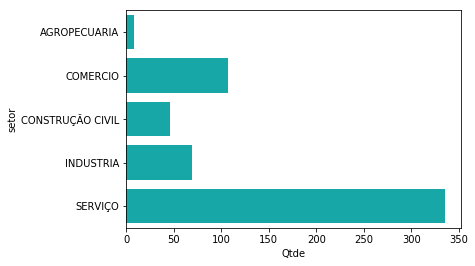

In [40]:
temp = pd.DataFrame({'setor':setores.index,'Qtde':setores.fl_matriz})
sns.barplot(x='Qtde',y="setor", data=temp, color="c");

In [41]:
df.de_natureza_juridica.unique()

array(['AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL', 'MUNICIPIO',
       'SOCIEDADE SIMPLES LIMITADA', 'SOCIEDADE EMPRESARIA LIMITADA',
       'CONDOMINIO EDILICIO',
       'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
       'ASSOCIACAO PRIVADA',
       'ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'SOCIEDADE ANONIMA FECHADA',
       'ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL',
       'ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL', 'FUNDACAO PRIVADA',
       'FUNDO PUBLICO', 'ENTIDADE SINDICAL', 'EMPRESARIO INDIVIDUAL',
       'COOPERATIVA', 'AUTARQUIA MUNICIPAL', 'AUTARQUIA FEDERAL',
       'SOCIEDADE DE ECONOMIA MISTA',
       'ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL',
       'SERVICO SOCIAL AUTONOMO', 'SOCIEDADE ANONIMA ABERTA',
       'FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL',
       'ORGANIZACAO RELIGIOSA',
       'ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL',
       'ORGAO PUBLICO DO PODER EXECUT

In [43]:
#df.groupby(['setor','de_natureza_juridica']).count().to_frame()

In [44]:
df.idade_emp_cat.unique()

array(['10 a 15', '> 20', '15 a 20'], dtype=object)

In [45]:
df.idade_empresa_anos.head(10)

0    11.243836
1    43.789041
2    16.389041
3    39.671233
4    20.268493
5    20.030137
6    18.906849
7    21.947945
8    19.610959
9    43.854795
Name: idade_empresa_anos, dtype: float64

In [46]:
df.idade_empresa_anos.mean()

26.98769059489812

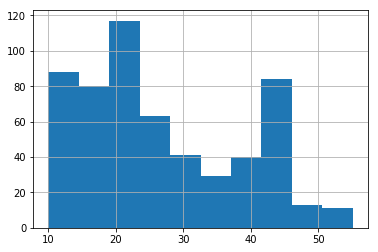

In [47]:
df.idade_empresa_anos.hist()

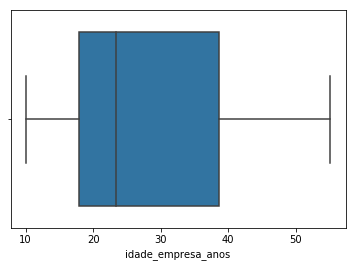

In [48]:
sns.boxplot(df.idade_empresa_anos)

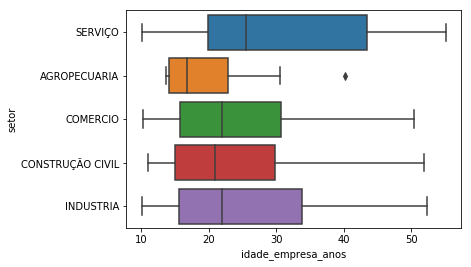

In [49]:
sns.boxplot(x='idade_empresa_anos', y='setor', data=df)

In [50]:
de_faixa_fatur_est = pd.DataFrame(df.groupby('de_faixa_faturamento_estimado').count())
de_faixa_fatur_est

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
de_faixa_faturamento_estimado,,,,,,,,,,,,,,,,,,,,,
ACIMA DE 1 BILHAO DE REAIS,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
"DE R$ 10.000.000,01 A R$ 30.000.000,00",278,278,278,278,278,278,278,278,278,278,...,278,278,241,229,229,278,278,278,278,278
"DE R$ 100.000.000,01 A R$ 300.000.000,00",58,58,58,58,58,58,58,58,58,58,...,58,58,56,55,55,58,58,58,58,58
"DE R$ 30.000.000,01 A R$ 100.000.000,00",202,202,202,202,202,202,202,202,202,202,...,202,202,172,185,185,202,202,202,202,202
"DE R$ 300.000.000,01 A R$ 500.000.000,00",15,15,15,15,15,15,15,15,15,15,...,15,15,14,14,14,15,15,15,15,15
"DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [51]:
de_faixa_fatur_est = pd.DataFrame(df.groupby('de_faixa_faturamento_estimado').count())
de_faixa_fatur_est

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
de_faixa_faturamento_estimado,,,,,,,,,,,,,,,,,,,,,
ACIMA DE 1 BILHAO DE REAIS,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
"DE R$ 10.000.000,01 A R$ 30.000.000,00",278,278,278,278,278,278,278,278,278,278,...,278,278,241,229,229,278,278,278,278,278
"DE R$ 100.000.000,01 A R$ 300.000.000,00",58,58,58,58,58,58,58,58,58,58,...,58,58,56,55,55,58,58,58,58,58
"DE R$ 30.000.000,01 A R$ 100.000.000,00",202,202,202,202,202,202,202,202,202,202,...,202,202,172,185,185,202,202,202,202,202
"DE R$ 300.000.000,01 A R$ 500.000.000,00",15,15,15,15,15,15,15,15,15,15,...,15,15,14,14,14,15,15,15,15,15
"DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
